In [349]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score,log_loss
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Machine learning preprocessing and modeling
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [350]:
df_1 = pd.read_csv('diabetes_test.csv').set_index('id')
df_2 = pd.read_csv('diabetes_train.csv').set_index('id')
if 'diagnosed_diabetes' not in df_2.columns:
    df_2['diagnosed_diabetes'] = 0
df = pd.concat([df_1, df_2], axis=0)

#Preprocessing

In [351]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,...,Female,White,Highschool,Middle,Former,Employed,0,0,0,NaN
700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,...,Female,White,Highschool,Middle,Never,Unemployed,0,0,0,NaN
700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,...,Male,White,Highschool,Low,Never,Employed,0,0,0,NaN
700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,...,Male,White,Graduate,Middle,Former,Employed,0,0,0,NaN
700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,...,Male,White,Graduate,Low,Current,Unemployed,0,0,0,NaN


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 700000 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   age                                 1000000 non-null  int64  
 1   alcohol_consumption_per_week        1000000 non-null  int64  
 2   physical_activity_minutes_per_week  1000000 non-null  int64  
 3   diet_score                          1000000 non-null  float64
 4   sleep_hours_per_day                 1000000 non-null  float64
 5   screen_time_hours_per_day           1000000 non-null  float64
 6   bmi                                 1000000 non-null  float64
 7   waist_to_hip_ratio                  1000000 non-null  float64
 8   systolic_bp                         1000000 non-null  int64  
 9   diastolic_bp                        1000000 non-null  int64  
 10  heart_rate                          1000000 non-null  int64  
 11  cholesterol_

In [353]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,700000.000000
mean,50.381533,2.077596,83.866288,5.958338,7.000878,6.012296,25.876851,0.858838,116.318170,75.427451,70.131929,186.965747,53.820317,103.058923,123.218839,0.150457,0.182716,0.03116,0.623296
std,11.741245,1.053658,55.006110,1.468700,0.905763,2.034110,2.870822,0.038144,11.083525,6.863409,6.984826,17.254180,8.306235,19.501570,26.080040,0.357519,0.386434,0.17375,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,107.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,174.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.00000,0.000000
50%,50.000000,2.000000,72.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.00000,1.000000
75%,59.000000,3.000000,100.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,117.000000,139.000000,0.000000,0.000000,0.00000,1.000000
max,89.000000,9.000000,748.000000,9.900000,9.900000,16.500000,38.400000,1.050000,170.000000,104.000000,101.000000,289.000000,91.000000,226.000000,290.000000,1.000000,1.000000,1.00000,1.000000


In [354]:
df.isnull().sum()

age                                        0
alcohol_consumption_per_week               0
physical_activity_minutes_per_week         0
diet_score                                 0
sleep_hours_per_day                        0
screen_time_hours_per_day                  0
bmi                                        0
waist_to_hip_ratio                         0
systolic_bp                                0
diastolic_bp                               0
heart_rate                                 0
cholesterol_total                          0
hdl_cholesterol                            0
ldl_cholesterol                            0
triglycerides                              0
gender                                     0
ethnicity                                  0
education_level                            0
income_level                               0
smoking_status                             0
employment_status                          0
family_history_diabetes                    0
hypertensi

In [355]:
df.duplicated().sum()

np.int64(0)

In [356]:
num_features = ["age", "physical_activity_minutes_per_week", "diet_score", "sleep_hours_per_day", "screen_time_hours_per_day", 
                "bmi", "waist_to_hip_ratio", "systolic_bp", "diastolic_bp", "heart_rate", "cholesterol_total", "hdl_cholesterol", 
                "ldl_cholesterol", "triglycerides"]
cat_features = ["alcohol_consumption_per_week", "gender", "ethnicity", "education_level", "income_level", "smoking_status", 
                "employment_status", "family_history_diabetes", "hypertension_history", "cardiovascular_history"]

In [357]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"[i] Checking for outliers in {dataset_name}...")
    print("=" * 40)
    outlier_info = []
    
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("[✓] No outliers detected in any of the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_2, dataset_name="Training Data")

[i] Checking for outliers in Training Data...


,Feature,Outlier Count
0,age,1013
1,physical_activity_minutes_per_week,33490
2,diet_score,1997
3,sleep_hours_per_day,6152
4,screen_time_hours_per_day,2337
5,bmi,4254
6,waist_to_hip_ratio,6159
7,systolic_bp,775
8,diastolic_bp,5752
9,heart_rate,1797


In [358]:
checking_outlier(list_feature=num_features, df=df_1, dataset_name="Test data")

[i] Checking for outliers in Test data...


,Feature,Outlier Count
0,age,339
1,physical_activity_minutes_per_week,15579
2,diet_score,1050
3,sleep_hours_per_day,3235
4,screen_time_hours_per_day,1179
5,bmi,2107
6,waist_to_hip_ratio,329
7,systolic_bp,599
8,diastolic_bp,2767
9,heart_rate,1044


In [359]:
df = pd.get_dummies(df, columns=['gender','ethnicity','smoking_status','employment_status'])

In [360]:
df['education_level'].unique()

array(['Highschool', 'Graduate', 'Postgraduate', 'No formal'],
      dtype=object)

In [361]:
ord_enc=OrdinalEncoder(
    categories=[
        ['Low','Lower-Middle','Middle','Upper-Middle','High'], #income_level
        ['No formal', 'Highschool','Graduate','Postgraduate'] #education_level
    ]
)
df[['income_level', 'education_level']] = ord_enc.fit_transform(df[['income_level', 'education_level']])

In [362]:
# robust_transfomer = Pipeline(steps=[
#     ("scaler", RobustScaler()),
#     ("imputer", SimpleImputer(strategy="median"))
# ])

# cat_transfomer = Pipeline(steps=[
#     ("encoder", OneHotEncoder(handle_unknown="ignore")),
#     ("imputer", SimpleImputer(strategy="most_frequent"))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num_robust", robust_transfomer, num_features),
#         ("cat", cat_transfomer, cat_features),
#     ]
# )


In [363]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
id,,,,,,,,,,,,,,,,,,,,,
700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,...,False,False,True,False,True,False,True,False,False,False
700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,...,False,False,True,False,False,True,False,False,False,True
700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,...,False,False,True,False,False,True,True,False,False,False
700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,...,False,False,True,False,True,False,True,False,False,False
700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,...,False,False,True,True,False,False,False,False,False,True


In [364]:
df['income_level'].loc[df['income_level'] == 4.0]

id
700188    4.0
700198    4.0
700222    4.0
700254    4.0
700270    4.0
         ... 
699872    4.0
699894    4.0
699926    4.0
699962    4.0
699981    4.0
Name: income_level, Length: 25260, dtype: float64

In [365]:
corr = df.corr(numeric_only=True)
corr['diagnosed_diabetes'].sort_values(ascending=False)

diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
employment_status_Employed            0.004659
ethnicity_Other                       0.004170
sleep_hours_per_day                   0.003509
ethnicity_Asian                       0.003288
alcohol_consumption_per_week          0.002991
gender_Other                          0.002590
gender_Male                           0.001963
ethnicity_Whi

In [366]:
training_data = df.loc[df_2.index].copy()
testing_data = df.loc[df_1.index].copy()
testing_data = testing_data.drop(columns='diagnosed_diabetes')

# Drop rows with NaN in 'diagnosed_diabetes' from training_data
training_data = training_data.dropna(subset=['diagnosed_diabetes'])

#EDA

#ML Session

In [367]:
X= training_data.drop('diagnosed_diabetes',axis=1)
y=training_data['diagnosed_diabetes']

In [368]:
y.value_counts(normalize=True)

diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64

In [369]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [370]:
model_1=LogisticRegression(class_weight='balanced')
model_1.fit(X_train,y_train)
y_pred=model_1.predict(X_test)
accuracy_score1= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score1)

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

y_proba = model_1.predict_proba(X_test)[:, 1]  # probabilitas kelas 1
print("Probabilitas untuk setiap kelas 1:", y_proba)

Accuracy: 0.6256732142857143
AUC: 0.6366835576620348
Probabilitas untuk setiap kelas 1: [0.57778168 0.40692948 0.32957704 ... 0.75550271 0.60129907 0.44591717]


In [371]:
model_2 = RandomForestClassifier(n_estimators=10)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
accuracy_score2= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score2)

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

y_proba = model_2.predict_proba(X_test)[:, 1]  # probabilitas kelas 1
print("Probabilitas untuk setiap kelas 1:", y_proba)

Accuracy: 0.6177089285714286
AUC: 0.5922817764138142
Probabilitas untuk setiap kelas 1: [0.8 0.4 0.2 ... 0.8 0.7 0.7]


In [ ]:
# param_xgb = {
# "learning_rate": 0.010101790233963715, 
# "max_depth": 4, 
# "min_child_weight": 7.875908100225339, 
# "subsample": 0.7225393932188394, 
# "colsample_bytree": 0.5325708121965714, 
# "gamma": 1.2582788478340508,
# "lambda": 0.016947240752074988, 
# "alpha": 7.335937487680093, 
# "max_leaves": 123,
# "booster": "gbtree",
# "random_state": 42,
# "use_label_encoder": False,
# "verbosity": 0,
# "tree_method": "gpu_hist",
# "predictor": "gpu_predictor",
# "grow_policy": "lossguide",
# "n_jobs": -1,
# "n_estimators": 20000,
# "max_bin": 256,
# "objective": "binary:logistic",
# "eval_metric": "auc"    
# }

model_3=XGBClassifier()

model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)
accuracy_Score3=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_Score3)

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

y_proba = model_3.predict_proba(X_test)[:, 1]  # probabilitas kelas 1
print("Probabilitas untuk setiap kelas 1:", y_proba)

Accuracy: 0.6794928571428571
AUC: 0.6311805589785123
Probabilitas untuk setiap kelas 1: [0.7421262  0.53696483 0.48126602 ... 0.9213877  0.71299887 0.62582016]


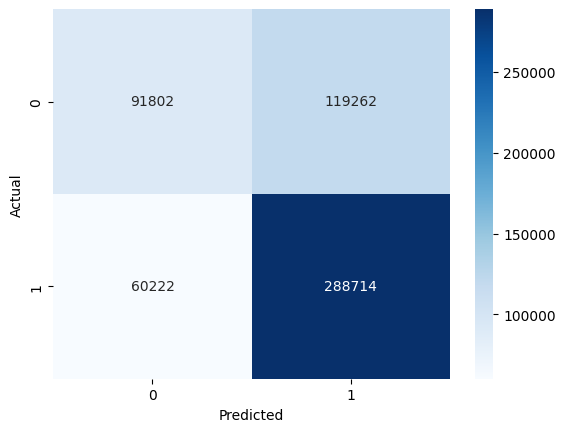

In [373]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [374]:
pred = model_3.predict(testing_data)

final = pd.DataFrame()
final['id'] = testing_data.index
final['diagnosed_diabetes'] = pred
final.to_csv('submission1.csv', index=False)